# Week 1



In [1]:
import numpy as np


def mymean(xs):
    result = 0.0
    for x in xs:
        result += x
        # print("x=", x)
    return result / len(xs)


def mysamplevar(xs):
    result = 0.0
    themean = mymean(xs)
    for x in xs:
        result += (x - themean) ** 2
    return result / (len(xs) - 1)


def mysamplestd(xs):
    return np.sqrt(mysamplevar(xs))


def mysamplecov(xs, ys):
    result = 0.0
    themeanx = mymean(xs)
    themeany = mymean(ys)
    for i in range(0, len(xs)):
        x = xs[i]
        y = ys[i]
        result += (x - themeanx) * (y - themeany)
    return result / (len(xs) - 1)


def mysamplecorr(xs, ys):
    sigmax = mysamplestd(xs)
    sigmay = mysamplestd(ys)
    samplecov = mysamplecov(xs,ys)
    return samplecov / (sigmax * sigmay)

In Exercise 2, we compare our implemented routines for estimating moments 
with the corresponding functions implemented in numpy.
In practice, you would use the functions implemented in numpy.


Note on the sample variance in numpy:
''The mean is normally calculated as x.sum() / N, where N = len(x).
If, however, ddof is specified, the divisor N - ddof is used instead.
In standard statistical practice, ddof=1 provides an unbiased estimator of
the variance of a hypothetical infinite population.
ddof=0 provides a maximum likelihood estimate of the variance for
normally distributed variables.'', see
https://numpy.org/doc/stable/reference/generated/numpy.var.html


In [25]:
# Testing the functions and comparing them to the numpy versions.
# Creating two arrays:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(x)
y = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1])
print(y)

# Computing the mean
print("Mean of x computed via np is ", np.mean(x),
      "and with our own function it is ", mymean(x))

# Computing the sample variance
print("Sample variance of x computed via np is ", np.var(x, ddof=1),
      "and with our own function it is ", mysamplevar(x))

# Computing the sample correlation

print("Sample correlation of x and y computed via np is ", np.corrcoef(x,y)[0,1],
      "and with our own function it is ", mysamplecorr(x,y))




[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]
Mean of x computed via np is  5.0 and with our own function it is  5.0
Sample variance of x computed via np is  7.5 and with our own function it is  7.5
Sample correlation of x and y computed via np is  -1.0 and with our own function it is  -1.0


## Vectorization 

A useful rule of thumb is to avoid for-loop statements in the implmenetation. Using **inbuilt functions** and **vectorizing the computation** enhance the efficiency.

In [18]:
# Compare the efficiency of different implementations for large sample sizes.

def mymean_noloop(xs):
    return np.sum(xs) / len(xs)



import time

x = np.arange(0, 1e6, 1)
print(x)


# Computation time for the sample mean

start = time.time()

np_mean = np.mean(x)
end_np = time.time()

my_mean = mymean(x)
end_my_loop = time.time()

my_mean_noloop = mymean_noloop(x)
end_my_noloop = time.time()

print("Sample mean of x is computed by np in {} seconds".format(end_np-start))
print("Sample mean of x is computed by our own function with looping in {} seconds".format(end_my_loop-end_np))
print("Sample mean of x is computed by our own function without looping in {} seconds".format(end_my_noloop-end_my_loop))

[0.00000e+00 1.00000e+00 2.00000e+00 ... 9.99997e+05 9.99998e+05
 9.99999e+05]
Sample mean of x is computed by np in 0.0007233619689941406 seconds
Sample mean of x is computed by our own function with looping in 0.2040567398071289 seconds
Sample mean of x is computed by our own function without looping in 0.0008189678192138672 seconds


# Exercise 3: Evaluation of the normal distribution 

In Exercise 3, we compute quantities related to the cdf and pdf of the normal distribution.



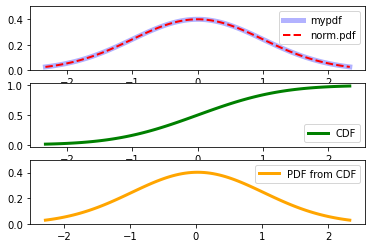

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm


# Evaluate the CDF of the standard normal distribution:
# loc = mean, scale = standard deviation (can be omitted for standard normal)
x = norm.cdf(0, loc=0, scale=1)
y = norm.cdf(1.96, loc=0, scale=1)

# Evaluate the generalised inverse of the CDF (ppf = percentiles)
# of the normal distribution:
z = norm.ppf(0.975, loc=0, scale=1)


# Our own function for the pdf of the normal distribution
def mypdf(x, mu=0, sigma=1):
    tmp1 = 1.0/(np.sqrt(2.0 * math.pi) * sigma)
    tmp2 = np.exp(- 0.5 * ((x - mu) / sigma)**2)
    return tmp1 * tmp2


# result = mypdf(0.0)

# Plot the density of the standard normal distribution on the grid x:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# Use our own function mypdf.
ax1.plot(x, mypdf(x), c="blue", alpha=0.3, lw=5, label='mypdf')
ax1.set_ylim(0, 0.5)

# Use the inbuilt function norm.pdf
ax1.plot(x, norm.pdf(x), c="red", alpha=1.0, lw=2, linestyle='dashed',
         label='norm.pdf')

ax1.legend(loc="upper right")


# Plot the inbuilt function norm.cdf

CDFvalues = norm.cdf(x, loc=0, scale=1)
ax2.plot(x, CDFvalues, c="green", lw=3, label="CDF")
ax2.legend(loc="lower right")

# Check the derivative of norm.cdf is the pdf. 

Deriv = np.array(CDFvalues)
tmpvalues1 = Deriv[1:]
tmpvalues2 = Deriv[:-1]
h = (norm.ppf(0.99) - norm.ppf(0.01)) / 100
Deriv = (tmpvalues1-tmpvalues2) / h

ax3.plot(x[1:], Deriv, c="orange", lw=3, label="PDF from CDF")
ax3.set_ylim(0, 0.5)
ax3.legend(loc="upper right")

# Exercise 4: The Black-Scholes option pricing formula

In the following we will explore the Black-Scholes option pricing formula in Python. 

## Black-Scholes option pricing formula for European call option
We will first provide an implementation of the Black-Scholes option pricing formula for a European Call option. 

Recall that the time-$t$ price of a European call option with strike $K$ and expiration time $T$ in the Black-Scholes model is given by
\begin{align*}
C(S_t,t) = \mathbb{E}[e^{-r(T-t)}(S_T-K)^+\mid S_t]=S_t \Phi(d_1) - K e^{-r(T-t)} \Phi(d_2), 
\end{align*}
where $S_t$ denotes the stock price at time $t$, $r > 0$ is the riskless interest rate, $\sigma > 0$ is the volatility of the stock price and
\begin{align*}
d_1 & = \frac{\log(\frac{S_t}{K}) + (r + 0.5 \sigma^2)(T-t) }{\sigma \sqrt{T-t}}, \\
d_2 & = d_1 - \sigma \sqrt{T-t}.  
\end{align*}


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(st, t, k, T, r, sigma):
    d1 = (np.log(st / k) + (r + 0.5 * sigma**2) * (T-t))/(sigma * np.sqrt(T-t))
    d2 = d1 - sigma * np.sqrt(T-t)
    tmp1 = st * norm.cdf(d1, loc=0, scale=1)
    tmp2 = k * np.exp(-r *(T-t)) * norm.cdf(d2, loc=0, scale=1)
    price = tmp1 - tmp2
    return price


myprice = black_scholes_call(st=50, t=0, k=50, T=1.0, r=0.05, sigma=0.3)
print("Price of European call option is: ", myprice)


Price of European call option is:  7.115627392992909


Next, we will analyse the sensitivity of the European call price with respect to some of the model parameters. 
This can be done analytically (by computing the Greeks), or we can do this by showing some plots.
We will only be considering some plots in this notebook. 

We will choose the following default parameters for now: 
\begin{align*}
K & = 50, \\
T & = 1, \\
r & = 0.05, \\ 
\sigma & = 0.2. 
\end{align*}


### Call price at $t=0$ but different $S_0$

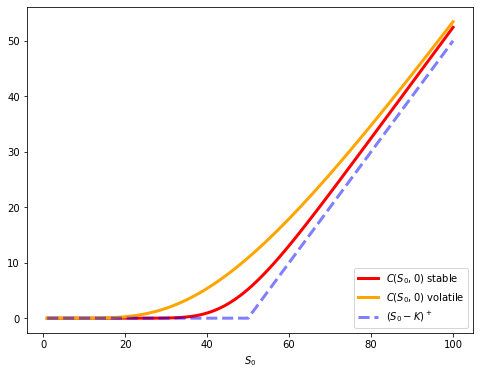

In [12]:
def call_payoff(s, k):
    return np.maximum(s - k, 0)


s_values = np.linspace(1, 100, 100)
call_intrinsic = call_payoff(s=s_values, k=50)

# call price in a stable market with sigma=0.2
callprice_s0 = black_scholes_call(st=s_values,t=0, k=50, T=1.0, r=0.05, sigma=0.2)

# call price in a volatile market with sigma=0.5
callprice_s0_vol = black_scholes_call(st=s_values,t=0, k=50, T=1.0, r=0.05, sigma=0.5)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(s_values, callprice_s0, lw=3, c="red", label="$C(S_0,0)$ stable")
ax.plot(s_values, callprice_s0_vol, lw=3, c="orange", label="$C(S_0,0)$ volatile")
ax.plot(s_values, call_intrinsic, lw=3, c="blue", label="$(S_0 - K)^+$",
        linestyle="dashed", alpha=0.5)
ax.legend(loc="lower right")
ax.set_xlabel("$S_0$")
plt.show()

### Call price at different $(S_t,t)$

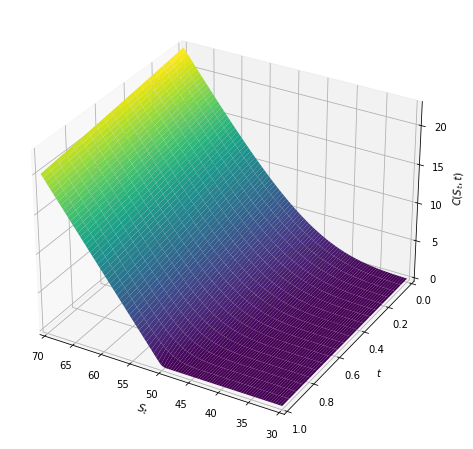

In [21]:
import numpy as np
from mpl_toolkits import mplot3d # allow for 3d plotting

import matplotlib.pyplot as plt

s0_values = np.linspace(30, 70, 100)
t_values = np.linspace(0, 0.999, 20)
s_grid, t_grid = np.meshgrid(s0_values, t_values)
callprice = black_scholes_call(st=s_grid,t=t_grid, k=50, T=1.0, r=0.05, sigma=0.2)



fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(s_grid, t_grid, callprice, rstride=1, cstride=1,
                                 cmap='viridis', edgecolor='none')

ax.set_xlim(70, 30)
ax.set_ylim(1, 0)

ax.set_xlabel('$S_t$')
ax.set_ylabel('$t$')
ax.set_zlabel('$C(S_t,t)$')


plt.show()


## Black-Scholes option pricing formula for European put option
We will then provide an implementation of the Black-Scholes option pricing formula for a European Put option. 

Recall that the time-$t$ price of a European out option with strike $K$ and maturity $T$ in the Black-Scholes model is given by
\begin{align*}
P(S_t,t) =\mathbb{E}[e^{-r(T-t)}(K-S_T)^+\mid S_t]=K e^{-r(T-t)} \Phi(-d_2)- S_t \Phi(-d_1) , 
\end{align*}
where $S_t$ denotes the stock price at time $t$, $r > 0$ is the riskless interest rate, $\sigma > 0$ is the volatility of the stock price and
\begin{align*}
d_1 & = \frac{\log(\frac{S_t}{K}) + (r + 0.5 \sigma^2)(T-t) }{\sigma \sqrt{T-t}}, \\
d_2 & = d_1 - \sigma \sqrt{T-t}.  
\end{align*}

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_put(st, t, k, T, r, sigma):
    d1 = (np.log(st / k) + (r + 0.5 * sigma**2) * (T-t))/(sigma * np.sqrt(T-t))
    d2 = d1 - sigma * np.sqrt(T-t)

    tmp1 = k * np.exp(-r *(T-t)) * norm.cdf(-d2, loc=0, scale=1)
    tmp2 = st * norm.cdf(-d1, loc=0, scale=1)
    price = tmp1 - tmp2
    return price

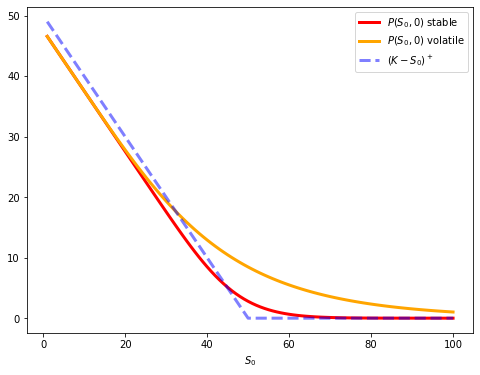

In [27]:
def put_payoff(s, k):
    return np.maximum(k-s, 0)


s_values = np.linspace(1, 100, 100)
put_intrinsic = put_payoff(s=s_values, k=50)

# put price in a stable market with sigma=0.2
putprice_s0 = black_scholes_put(st=s_values,t=0, k=50, T=1.0, r=0.05, sigma=0.2)

# put price in a volatile market with sigma=0.5
putprice_s0_vol = black_scholes_put(st=s_values,t=0, k=50, T=1.0, r=0.05, sigma=0.5)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(s_values, putprice_s0, lw=3, c="red", label="$P(S_0,0)$ stable")
ax.plot(s_values, putprice_s0_vol, lw=3, c="orange", label="$P(S_0,0)$ volatile")
ax.plot(s_values, put_intrinsic, lw=3, c="blue", label="$(K - S_0)^+$",
        linestyle="dashed", alpha=0.5)
ax.legend(loc="upper right")
ax.set_xlabel("$S_0$")
plt.show()